C:\Users\User\AppData\Local\Temp\ipykernel_28452\1107919110.py:33: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_28452\1107919110.py:33: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


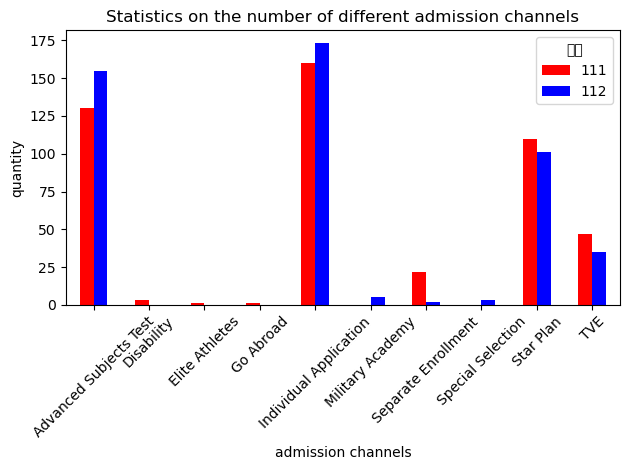

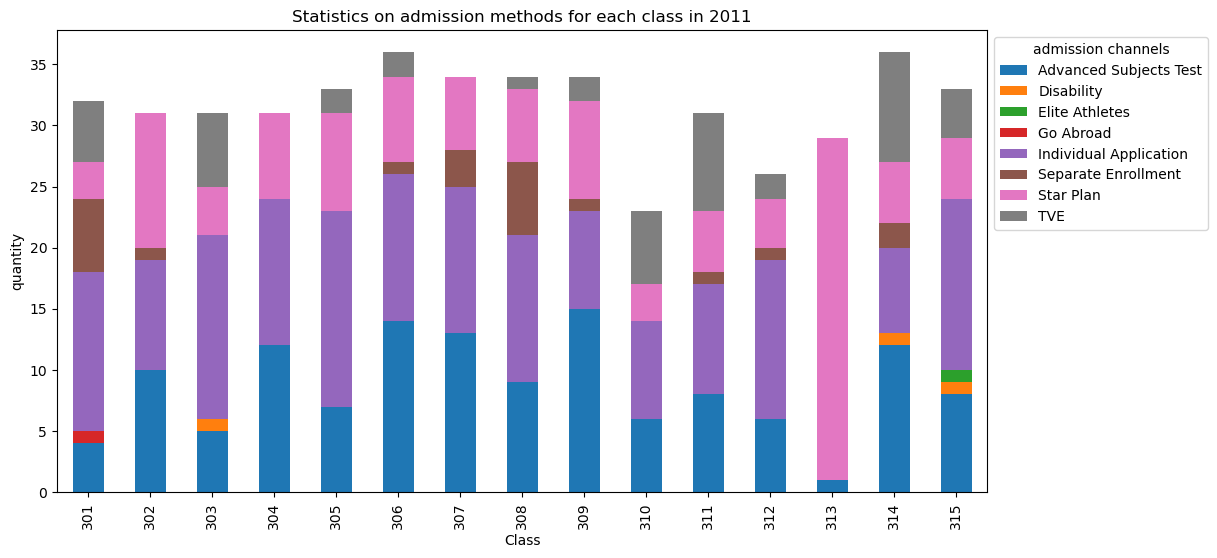

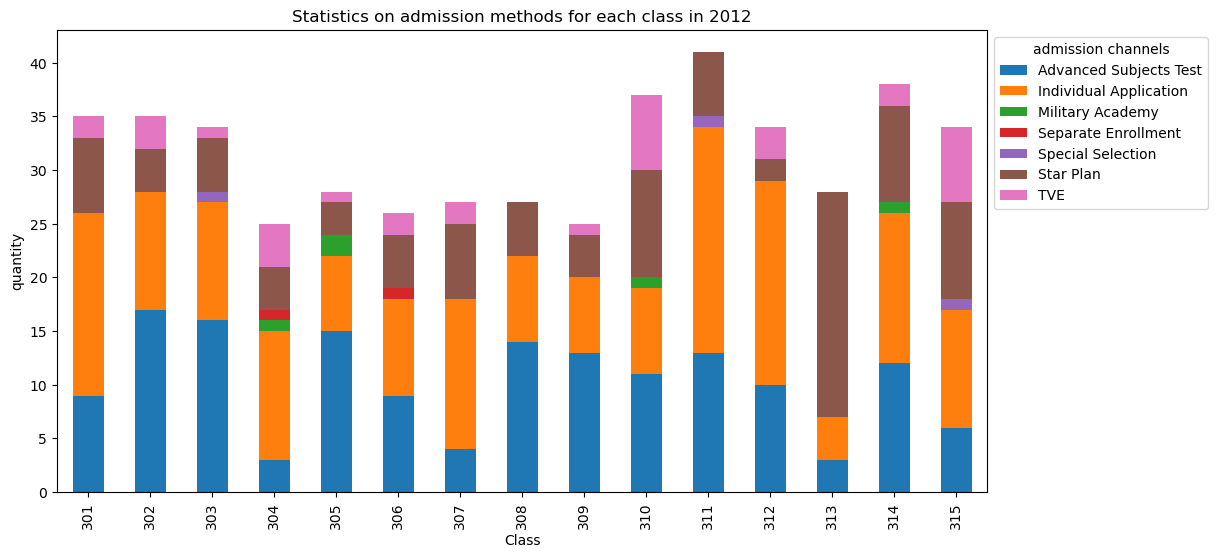

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23416 (\N{CJK UNIFIED IDEOGRAPH-5B78}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31649 (\N{CJK UNIFIED IDEOGRAPH-7BA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

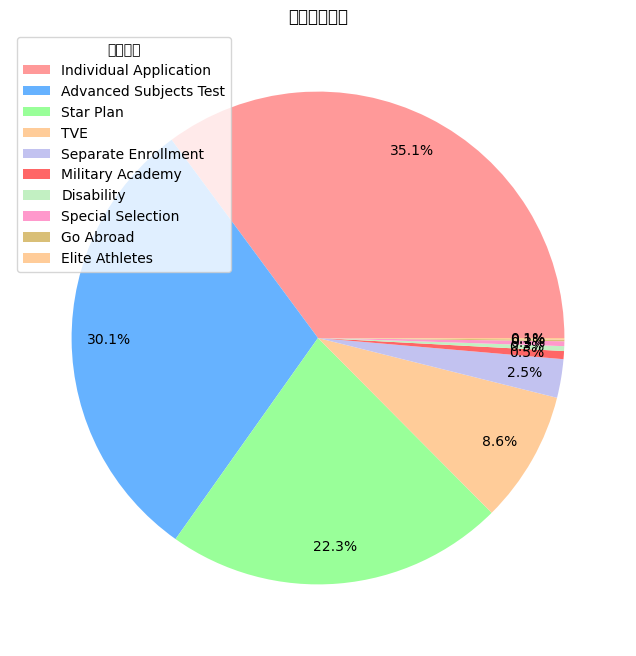

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取第一個xlsx文件(111年)並添加標示列
df1 = pd.read_excel('111.xlsx')
df1['Year'] = 111  # 添加年份標示列

# 讀取第一個xlsx文件(112年)並添加標示列
df2 = pd.read_excel('112.xlsx')
df2['Year'] = 112  # 添加年份標示列


# 1.兩年入學管道長條圖

# 合併兩個數據框架
combined_df = pd.concat([df1, df2])

# 統計不同入學管道的數量
entry_channel_counts = combined_df.pivot_table(index='入學管道', columns='Year', aggfunc='size', fill_value=0)

# 創建長條圖
plt.figure(figsize=(10, 6))
entry_channel_counts.plot(kind='bar', color=['red', 'blue'])
plt.title('Statistics on the number of different admission channels')
plt.xlabel('admission channels')
plt.ylabel('quantity') 
plt.xticks(rotation=45)  # 如果入學管道的標籤較多，可以旋轉標籤以避免重疊

# 添加圖例
plt.legend(title='年份')

# 顯示圖表
plt.tight_layout()
plt.show()


# 2.長條圖統計各班級的入學方式

# 使用 Pandas 分組並計算111入學管道
class_entry_counts = df1.groupby('班級')['入學管道'].value_counts().unstack(fill_value=0)

# 創建長條圖
class_entry_counts.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Statistics on admission methods for each class in 2011')
plt.xlabel('Class')
plt.ylabel('quantity')
plt.legend(title='admission channels', bbox_to_anchor=(1, 1))  # 添加圖例

plt.show()

# 使用 Pandas 分組並計算112入學管道
class_entry_counts_2 = df2.groupby('班級')['入學管道'].value_counts().unstack(fill_value=0)

# 創建長條圖
class_entry_counts_2.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Statistics on admission methods for each class in 2012')
plt.xlabel('Class')
plt.ylabel('quantity')
plt.legend(title='admission channels', bbox_to_anchor=(1, 1))  # 添加圖例

plt.show()


# 3.統計兩年重複出現的校系比率

# 合併兩個DataFrame
merged_df = pd.concat([df1, df2])

# 統計不同入學管道的數量
entry_channels = merged_df['入學管道'].value_counts()

# 設定顏色
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#C2C2F0', '#FF6666', '#C2F0C2', '#FF99CC', '#D9BF77', '#FFCC99']

# 繪製圓餅圖
plt.figure(figsize=(8, 8))
plt.pie(entry_channels, labels=['']*len(entry_channels), autopct='%1.1f%%', pctdistance=0.85, colors=colors)
plt.title('入學管道分佈')

# 添加圖例
plt.legend(entry_channels.index, title='入學管道', loc='upper left')

plt.show()